# Formative Assessment 7
## The independent samples t-test

## John Benedict Monfero

#### Provide an R or Python (with markdown) file for the independent samples t-test for Invisibility Cloak data set. 

In [17]:
# import all neccesary modules needed for this assessment
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/invisibility-cloak/Invisibility Cloak.csv')

## The file should have all the codes/and or explanations from Assumption 1 to 5 needed before to be able to perform independent sample t-test to the given dataset 

**Can we perform independent sample t-test on the given `Invisibility Cloak.csv` dataset?** Let us find out!

In [7]:
# Overview of the Dataset
df

,Participant,Cloak,Mischief
0,1,0,3
1,2,0,1
2,3,0,5
3,4,0,4
4,5,0,6
5,6,0,4
6,7,0,6
7,8,0,2
8,9,0,0
9,10,0,5


## Assumption 1: The Variable of Interest, also known as Dependent Variable, must be Continuous Data

**In this case, the variable Mischief is a numerical value (that is either an interval or ratio) representing some form of measurement (e.g., mischief score).**

## Assumption 2: Existence of Independent Groups

**There are two independent groups created within the `Cloak` series in the given dataset `Invisibility Cloak`; those with and without the cloak should be independent of each other. This is ensured because each participant either has the cloak (`Cloak = 1`) or not (`Cloak = 0`).**

In [8]:
# Split data into two groups
cloak_group = df[df['Cloak'] == 1]['Mischief']
no_cloak_group = df[df['Cloak'] == 0]['Mischief']

## Assumption 3: The Dependent Variable shall obey Normality Distribution

**The `Mischief` variable's scores in each `Cloak` and `No Cloak` groups should be approximately normally distributed. We can check this assumption by plotting histograms or using the Shapiro-Wilk test.**

Shapiro-Wilk test for Cloak group: statistic=0.9726, p-value=0.9362
Shapiro-Wilk test for No Cloak group: statistic=0.9128, p-value=0.2314


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


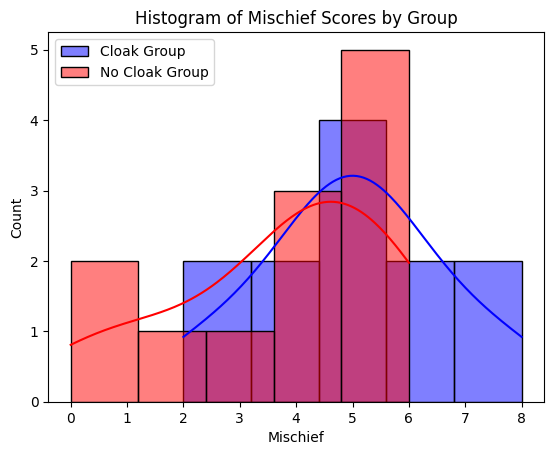

In [11]:
# Assumption 3: Check Normality
# Shapiro-Wilk Test for Normality
shapiro_cloak = stats.shapiro(cloak_group)
shapiro_no_cloak = stats.shapiro(no_cloak_group)

# Display results rounded to 4 decimal places
print(f"Shapiro-Wilk test for Cloak group: statistic={shapiro_cloak.statistic:.4f}, p-value={shapiro_cloak.pvalue:.4f}")
print(f"Shapiro-Wilk test for No Cloak group: statistic={shapiro_no_cloak.statistic:.4f}, p-value={shapiro_no_cloak.pvalue:.4f}")

# Visual check: histograms (no warnings)
sns.histplot(cloak_group, kde=True, color='blue', label='Cloak Group')
sns.histplot(no_cloak_group, kde=True, color='red', label='No Cloak Group')
plt.legend()
plt.title('Histogram of Mischief Scores by Group')
plt.show()

### Take Note (Whenever we are using Shapiro-Wilk Test, and Interpreting Results):

**Remember that the Shapiro-Wilk test checks if the data in each group follow a normal distribution.**

1. The null hypothesis $H₀$ of the Shapiro-Wilk test states that the data is normally distributed. Whenever we accept $H₀$ also means that the data is consistent with a normal distribution.

> When we shall accept the $H₀$: It is when the p-value's result on each independent group, is greater than 0.05 suggests that we are failed to reject the null hypothesis

### Results Recap:
#### Cloak group:
> Statistic = 0.9726

> p-value = 0.9362

#### No Cloak group:
> Statistic = 0.9128

> p-value = 0.2314

In [12]:
# Decision criterion for normality assumption
alpha = 0.05  # significance level

if shapiro_cloak.pvalue > alpha and shapiro_no_cloak.pvalue > alpha:
    print("Assumption 3 (Normality) is satisfied for both groups.")
else:
    print("Assumption 3 (Normality) is violated for one or both groups.")


Assumption 3 (Normality) is satisfied for both groups.


## Assumption 4: The Homogeneity of Variances
**Aside from the normality, the variance of each dependent variable's (`Mischief`) scores shall be roughly equals between two independent groups mentioned (with `Cloak` and `No Cloak`)**

**We can check this assumption through Lavene's Test**

### Levene's Test checks whether the variances between the two groups are equal.

**Null Hypothesis: If p-value > 0.05, then the variances among all groups are indeed equal**'

**Alternative Hypothesis: If p-value <= 0.05, then the variances of at least one independent groups are not equal**

In [18]:
# Importing Levene's Test from scipy
from scipy.stats import levene

# Levene's Test for homogeneity of variances
levene_test = levene(cloak_group, no_cloak_group)

# Displaying the result
print(f"Levene's test for equality of variances: statistic={levene_test.statistic:.4f}, p-value={levene_test.pvalue:.4f}")

Levene's test for equality of variances: statistic=0.2698, p-value=0.6087


**If the p-value is greater than 0.05, we fail to reject $H₀$, meaning that the assumption of equal variances is satisfied.**

## Assumption 5: The Sampling must be Randomly Selected

**In general, we are ensuring the given datasets were gathered through non-biased methodology, by which we assume the `Invisibility Cloak.csv` obeys this in order the results is not-accurate to the population it refers**

## The Independent Sample T-test

In [19]:
# Importing t-test from scipy
from scipy.stats import ttest_ind

# Conducting the independent samples t-test (assuming equal variances)
t_test = ttest_ind(cloak_group, no_cloak_group, equal_var=True)

# Displaying the t-test result
print(f"Independent t-test: statistic={t_test.statistic:.4f}, p-value={t_test.pvalue:.4f}")

Independent t-test: statistic=1.7135, p-value=0.1007


## Analysis and Interpretation Report of the t-test:

### Statistic: 1.7135
> The value above tells us the direction and magnitude of the difference between independent groups

### p-value: 0.1007
> Since the p-value of the t-test is greater than 0.05, then we are failed to reject the Null Hypothesis of the t-test that is:

#### Null Hypothesis:
**There is no significant difference in the `Mischief` mean's scores, among the participants with `Cloak` and `No Cloak`.**

#### Alternative Hypothesis: 
**There is a significant difference in the `Mischief` mean's scores, among the participants with `Cloak` and `No Cloak`.** 